In [1]:
# Read amz_uk_price_prediction_dataset.csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Read the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Parte 1

In [94]:
# Create a crosstab between the product category and the isBestSeller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [3]:
# Convertir la columna 'isBestSeller' a booleano si es necesario
df['isBestSeller'] = df['isBestSeller'].astype(bool)

# Crear una tabla cruzada entre 'category' e 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calcular la proporción de best-sellers por categoría
crosstab['Proporción_BestSellers'] = crosstab[True] / (crosstab[True] + crosstab[False]) * 100

# Ordenar por la proporción de best-sellers en orden descendente
crosstab_sorted = crosstab.sort_values(by='Proporción_BestSellers', ascending=False)

# Mostrar los resultados
crosstab_sorted

isBestSeller,False,True,Proporción_BestSellers
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [7]:
from scipy.stats.contingency import association

In [14]:
# Conduct a Chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab.iloc[:, :-1].values)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# p_value 0 < 0,05 -> 0 -> variables relacionadas: hay relación entre la categoría y si es un best-seller

# Compute Cramér's V
n = crosstab.iloc[:, :-1].sum().sum()
cramers_v = math.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

# Show alternative method to compute Cramér's V
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

# Toño: association method by stats #0.122
k = association(crosstab.iloc[:, :-1], method='cramer')


print(f"Stats: {stats}")
print(f"Toño K: {k}")

print(f"Cramér's V: {cramers_v}")

# Cramér's V = 0.5 -> relación fuerte

Chi-square test statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Stats: <module 'scipy.stats' from 'c:\\Users\\jesus\\anaconda3\\Lib\\site-packages\\scipy\\stats\\__init__.py'>
Toño K: 0.1222829439760564
Cramér's V: 0.08646709890892415


In [ ]:
# Definir un umbral de outliers (percentil 5)
outlier_threshold = crosstab.max(axis=1).quantile(0.05)

# Filtrar las categorías con valores por encima del umbral
filtered_crosstab = crosstab[crosstab.max(axis=1) < outlier_threshold]

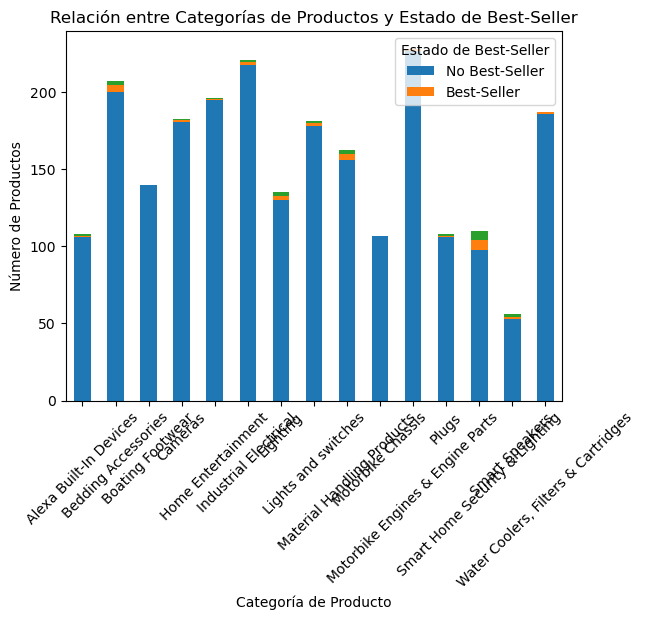

In [22]:
# Graficar el gráfico de barras apiladas
filtered_crosstab.plot(kind='bar', stacked=True)

# Configurar etiquetas y título
plt.xlabel("Categoría de Producto")
plt.ylabel("Número de Productos")
plt.title("Relación entre Categorías de Productos y Estado de Best-Seller")
plt.xticks(rotation=45)
plt.legend(["No Best-Seller", "Best-Seller"], title="Estado de Best-Seller")

# Mostrar el gráfico
plt.show()

# Parte 2

In [ ]:
# 0. **Preliminary Step: Remove outliers in product prices.**
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
# *Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

# Calculate the first and third quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds (Bigotes)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the number of outliers removed
outliers_removed = len(df) - len(df_filtered)
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 327688


C:\Users\jesus\AppData\Local\Temp\ipykernel_20948\2027641509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')


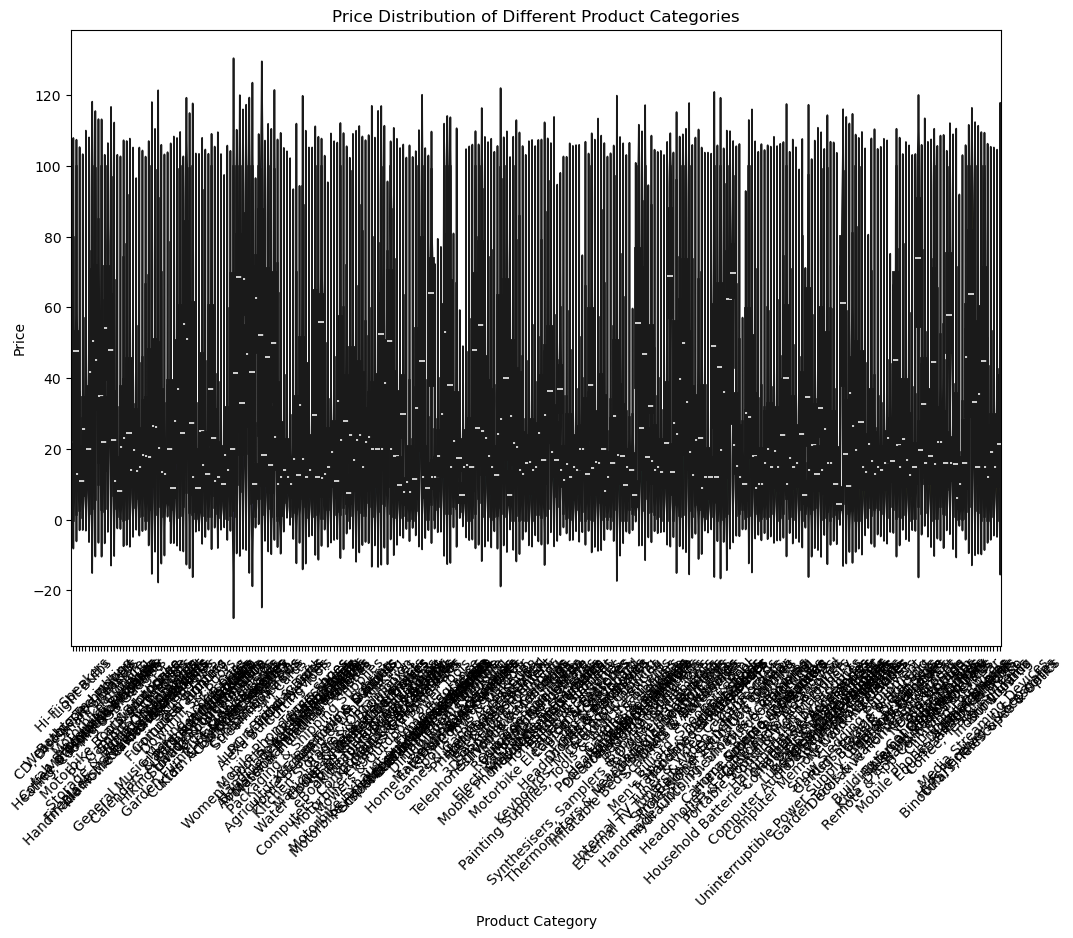

In [100]:
# Use a violin plot to visualize the distribution of `price` across different product `categories`. 
# This plot will help us understand the price distribution of different product categories and identify any potential outliers.

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')

# Set the title and labels
plt.title('Price Distribution of Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [101]:
# Which product category tends to have the highest median price?
# Don't filter here by top categories.

# Filtered dataset is df_filtered
# Calculate the median price for each category
median_price_by_category = df_filtered.groupby('category')['price'].median().sort_values(ascending=False)

# Display the median price by category
median_price_by_category

# "Desktop PCs" tend to have the highest median price among the product categories.


category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

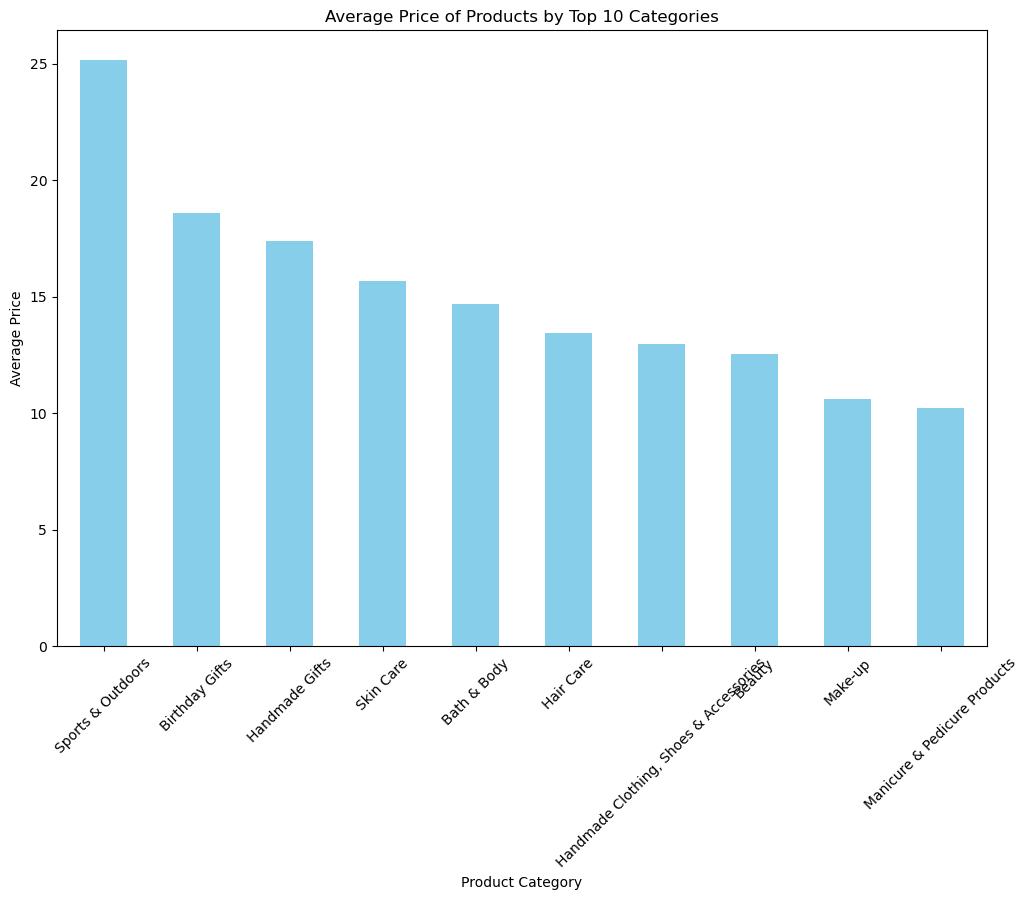

In [102]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count)
# Filter the dataset to include only the top 10 product categories based on the count of products
top_categories = df_filtered['category'].value_counts().head(10).index

# Filter the dataset to include only the top categories
df_top_categories = df_filtered[df_filtered['category'].isin(top_categories)]

# Calculate the average price for each category
average_price_by_category = df_top_categories.groupby('category')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
average_price_by_category.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Average Price of Products by Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [103]:
# Which product category commands the highest average price? 
# Don't filter here by top categories.

# Sports & Outdoors has the highest average price among the top 10 categories.

C:\Users\jesus\AppData\Local\Temp\ipykernel_20948\3390730201.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x="category", y="stars", palette="viridis")


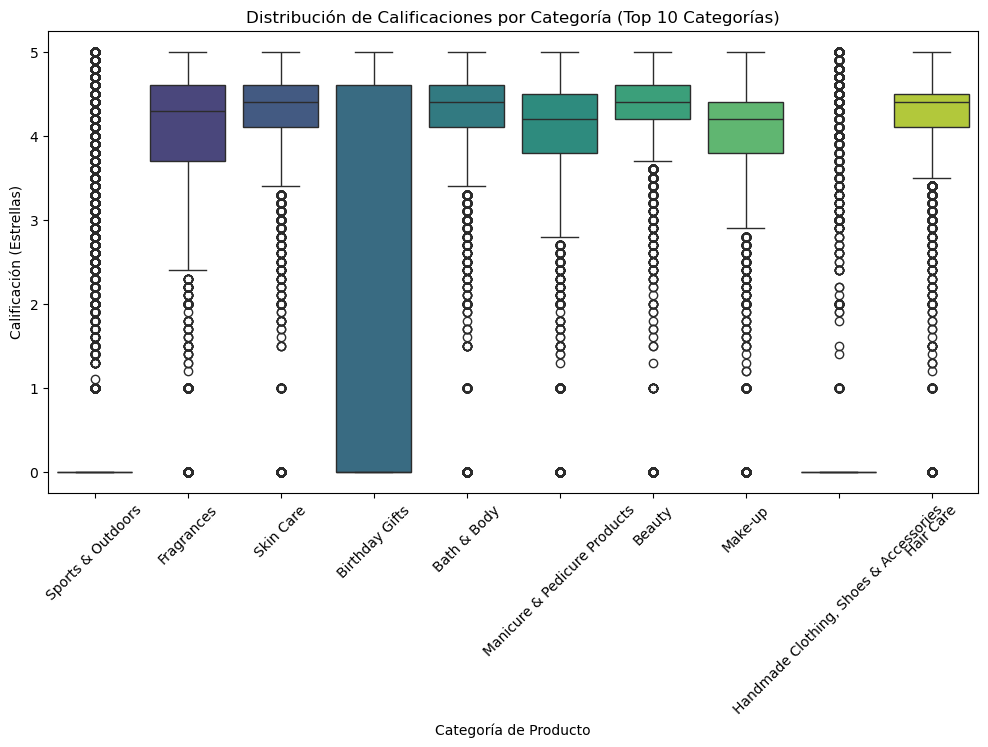

In [104]:
# Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 
# Convertir `stars` (calificaciones) a numérico (por si hay valores no numéricos)
df["stars"] = pd.to_numeric(df["stars"], errors="coerce")

# Contar las 10 categorías más comunes
top_categories = df["category"].value_counts().nlargest(10).index

# Filtrar el dataset solo con esas 10 categorías
filtered_df = df[df["category"].isin(top_categories)]

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="category", y="stars", palette="viridis")

# Configuración del gráfico
plt.xlabel("Categoría de Producto")
plt.ylabel("Calificación (Estrellas)")
plt.title("Distribución de Calificaciones por Categoría (Top 10 Categorías)")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [105]:
# Filter out the top 10 categories based on count for better visualization.
# Filter the dataset to include only the top 10 product categories based on the count of products
top_categories = df_filtered['category'].value_counts()

top_categories.head(10)

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Name: count, dtype: int64

In [106]:
# Which category tends to receive the highest median rating from customers?
# Filtered dataset is df_filtered
# Calculate the median rating for each category
median_rating_by_category = df_filtered.groupby('category')['stars'].median().sort_values(ascending=False)

# Display the median rating by category
median_rating_by_category


category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

# Parte 3

In [107]:
# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Filter necessary columns: 'price' and 'stars'
df_filtered = df[['price', 'stars']].dropna()

In [ ]:
# Calculate the correlation coefficient between `price` and `stars`
correlation_coefficient = df_filtered['price'].corr(df_filtered['stars'])

# Display the correlation coefficient = -0.1249067326214861
correlation_coefficient

-0.1249067326214861

In [109]:
# Analyze Significance of Correlation

# Interpret the correlation coefficient to determine if there is a significant correlation between product price and its rating
if abs(correlation_coefficient) > 0.5:
    significance = "There is a significant correlation between product price and its rating."
else:
    significance = "There is no significant correlation between product price and its rating."

# Display the significance interpretation
significance

'There is no significant correlation between product price and its rating.'

In [111]:
# Analiza la significancia de la correlación mediante chi-square test y Cramér's V

# Conduct a Chi-square test
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_filtered['price'], df_filtered['stars']))

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Compute Cramér's V
n = df_filtered.shape[0]
cramers_v = math.sqrt(chi2 / (n * (min(df_filtered.shape) - 1)))

print(f"Cramér's V: {cramers_v}")


Chi-square test statistic: 2360775.966201346
P-value: 1.0
Degrees of freedom: 3399515
Cramér's V: 0.9828965198668186


No existe relación entre price y stars.

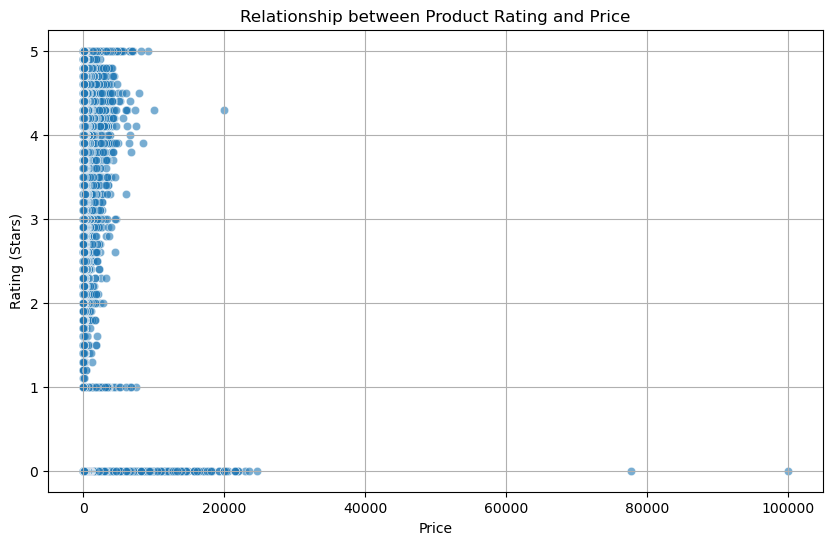

In [112]:
# Use a scatter plot to visualize the relationship between product rating and price. 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='price', y='stars', alpha=0.6)

# Set the title and labels
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.grid(True)

# Display the plot
plt.show()

##### What patterns can you observe?

No patterns between price and stars.

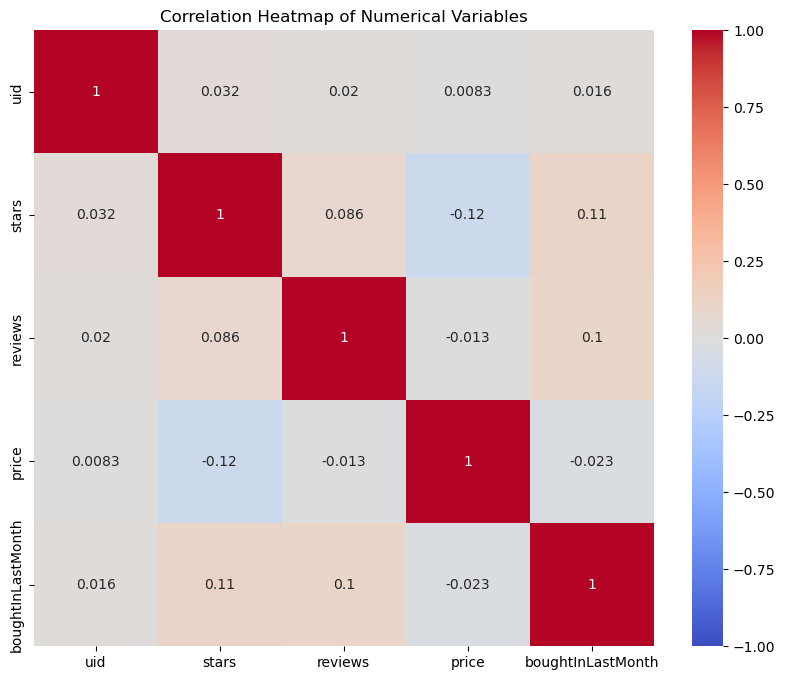

In [114]:
# Use a correlation heatmap to visualize correlations between all numerical variables
# Filter the dataset to include only numerical columns
df_numerical = df.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap of Numerical Variables')

# Display the plot
plt.show()

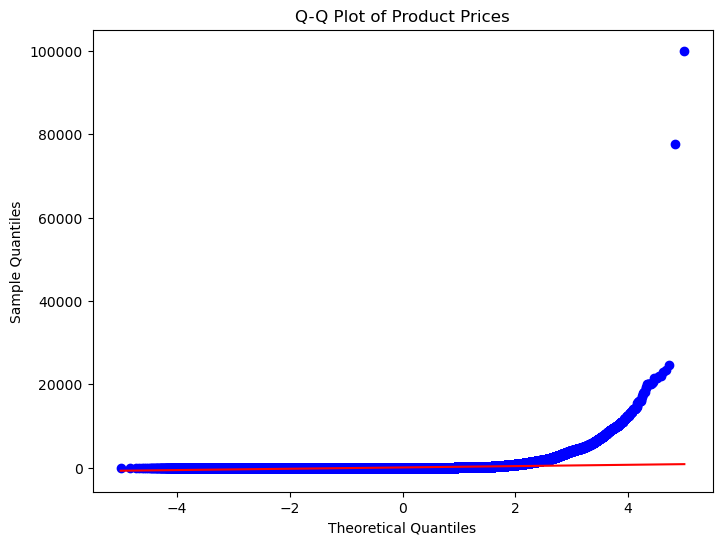

In [ ]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
# Filter the dataset to include only the 'price' column
price_data = df_filtered['price']

# Create a QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(price_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
